# Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


## Microcircuit Conenctivity

In [1]:
from IPython.display import Image
Image("../NeuroML/Fig1/Fig1a.png")

In [2]:
populations = ['exc', 'pv', 'sst', 'vip']
colours = ['blue', 'red', 'darkorchid', 'green']

## Low Baseline Activity

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


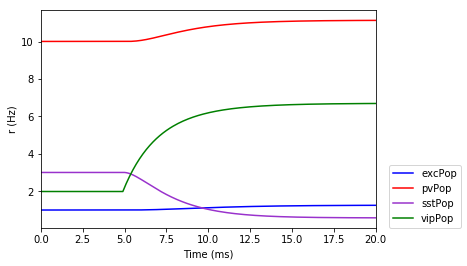

In [4]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in low_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, low_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## High Baseline Activity

In [5]:
high_lems_file='../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml'
high_results = pynml.reload_saved_data(high_lems_file)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


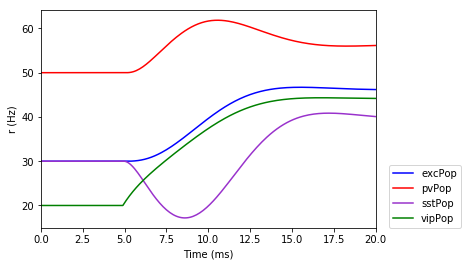

In [6]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(high_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in high_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, high_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_exc.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_exc.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_pv.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_pv.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks

pyNeuroML >>> Reloading data specified i

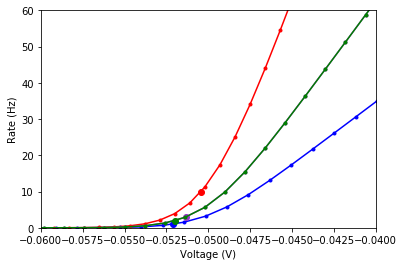

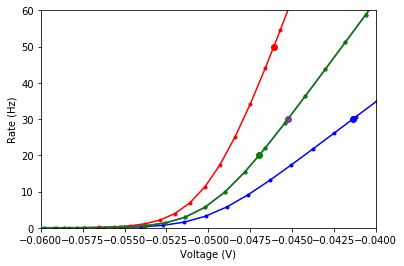

In [7]:
import numpy as np
n_units = 20
baselines = ['low', 'high']

r = {}
v = {}
for baseline in baselines:
    plt.figure()
    for population_idx, population in enumerate(populations):
        lems_file = '../NeuroML/Fig2/LEMS_fISim_%s.xml' %population
        # Run simulation
        # cleanup: remove the .dat file after loading them
        results = pynml.reload_saved_data(lems_file)
        # get the last values of the simulation and plot the fI Curve

        r[population] = np.zeros((n_units))
        v[population] = np.zeros((n_units))
        for unit in range(n_units):
            pop_unit_r = '%sPop[%d]/r' %(population, unit)
            pop_unit_V = '%sPop[%d]/V' %(population, unit)
            r[population][unit] = results[pop_unit_r][-1]
            v[population][unit] = results[pop_unit_V][-1]

        plt.plot(v[population], r[population], marker='.', color=colours[population_idx])

        # load the low_baseline results and plot them on the fI curve
        baseline_lems = '../NeuroML/Fig1/LEMS_RateBased_%s_baseline.xml' %baseline
        results_baseline = pynml.reload_saved_data(baseline_lems)
        population_v = '%sPop[0]/V' %population
        population_r = '%sPop[0]/r' %population
        # Note: I am taking the first time point as at time point 0 the membrane voltage has not yet reached the baseline
        #  activity steady-state
        plt.plot(results_baseline[population_v][1], results_baseline[population_r][1], 'o', color=colours[population_idx])
        print('')

        plt.xlabel('Voltage (V)')
        plt.ylabel('Rate (Hz)')
        plt.xlim(-.060, -.040)
        plt.ylim(0, 60)
        plot_name = 'fI_%s_baseline.png' %baseline

In [8]:
from datetime import datetime
lems_low_file = '../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml'
results_low = pynml.reload_saved_data(lems_low_file, 
                      base_dir = '.',
                      t_run = datetime(1900,1,1), # change me!
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False,
                      remove_dat_files_after_load = False) 

lems_high_file = '../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml'
results_high = pynml.reload_saved_data(lems_high_file,
                      base_dir = '.',
                      t_run = datetime(1900,1,1), # change me!
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False,
                      remove_dat_files_after_load = False) 

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


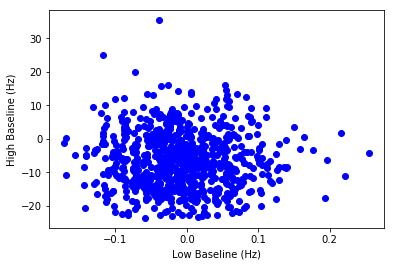

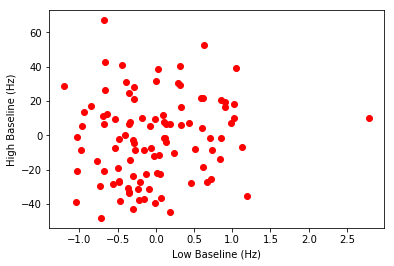

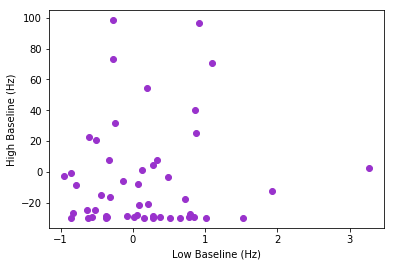

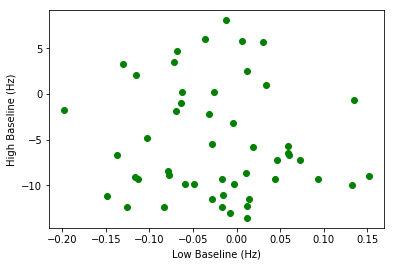

In [11]:
import pdb
n_pops = [800, 100, 50, 50]
units = ['exc', 'pv', 'sst', 'vip']
population_idx = 0
for pop_idx, pop in enumerate(units):
    plt.figure()
    plt.xlabel('Low Baseline (Hz)')
    plt.ylabel('High Baseline (Hz)')
    for n_pop in range(n_pops[pop_idx]):
        pop_unit = '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        plt.plot(results_low[pop_unit][100] - results_low[pop_unit][0],
                 results_high[pop_unit][100] - results_high[pop_unit][0] ,
                 'o', color=colours[pop_idx])
    


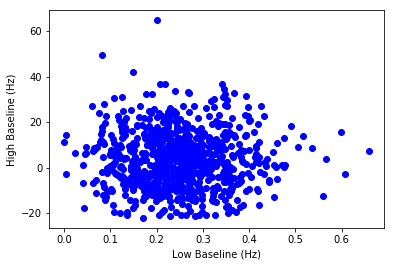

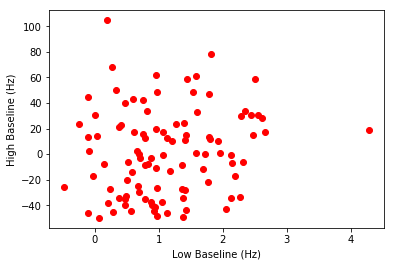

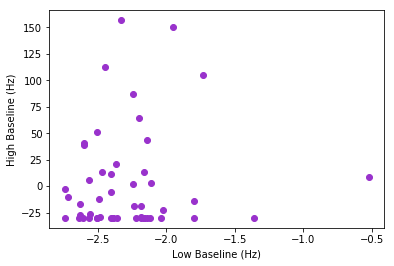

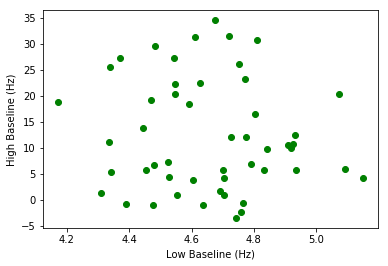

In [14]:
population_idx = 0
for pop_idx, pop in enumerate(units):
    plt.figure()
    plt.xlabel('Low Baseline (Hz)')
    plt.ylabel('High Baseline (Hz)')
    for n_pop in range(n_pops[pop_idx]):
        pop_unit = '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        plt.plot(results_low[pop_unit][-1] - results_low[pop_unit][0],
                 results_high[pop_unit][-1] - results_high[pop_unit][0] ,
                 'o', color=colours[pop_idx])
    